In [11]:
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv("Netflix Userbase.csv")
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [13]:
df.duplicated().sum()

0

In [14]:
df.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

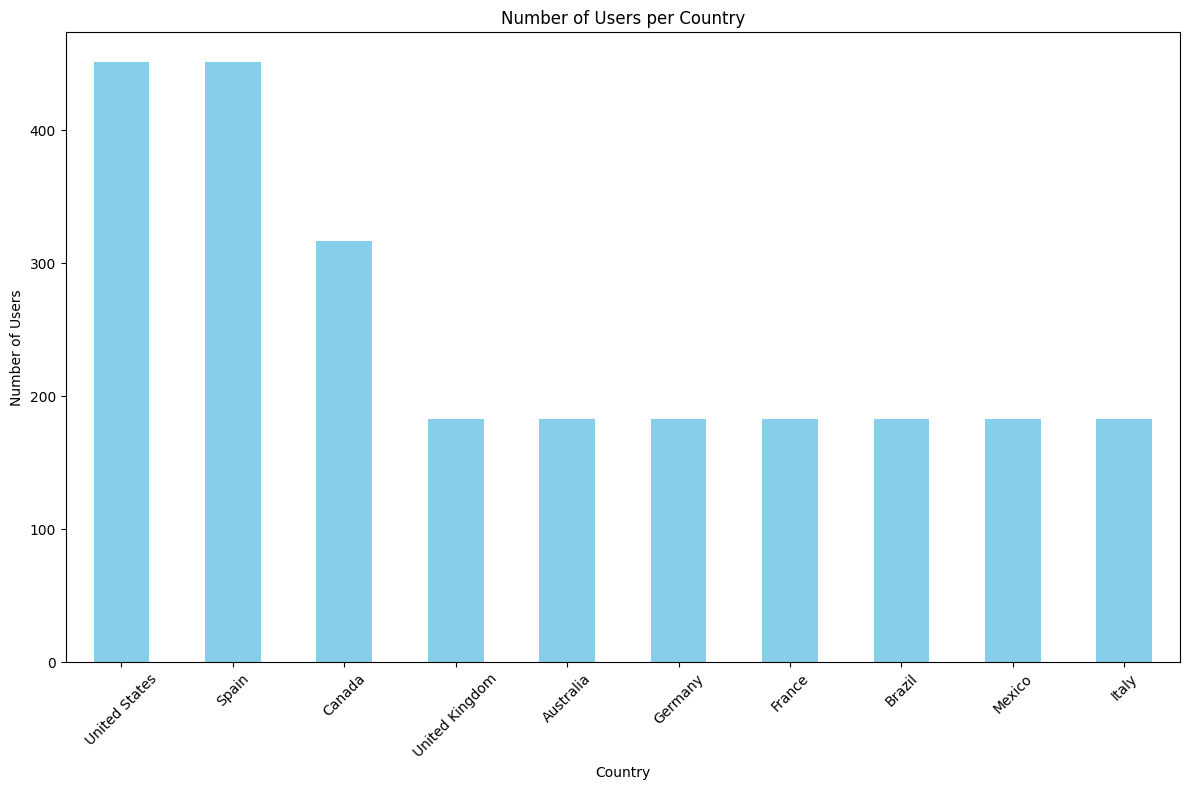

In [15]:
plt.figure(figsize=(12,8))
df['Country'].value_counts().plot(kind='bar',color='skyblue')
plt.title('Number of Users per Country')
plt.xlabel("Country")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

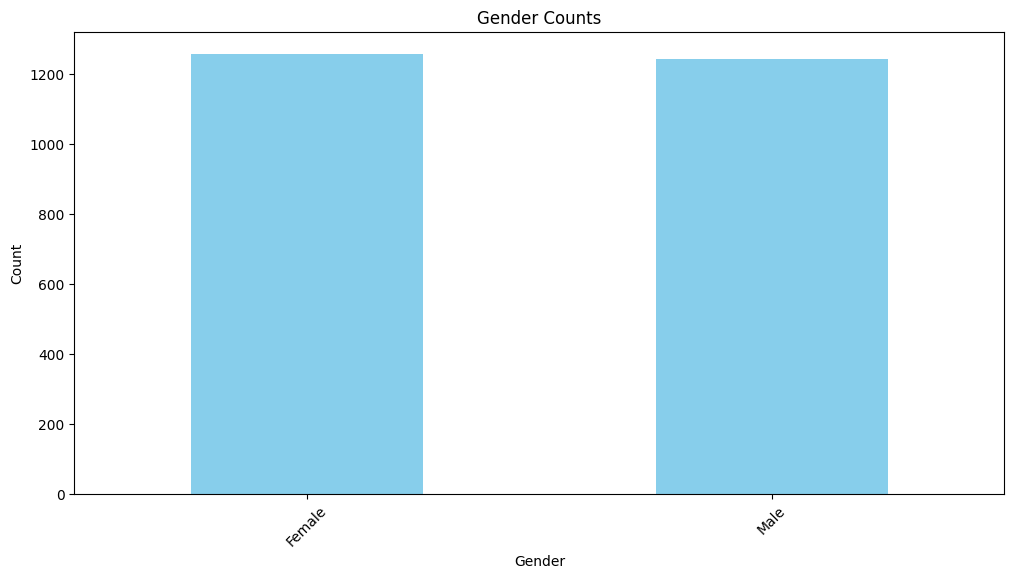

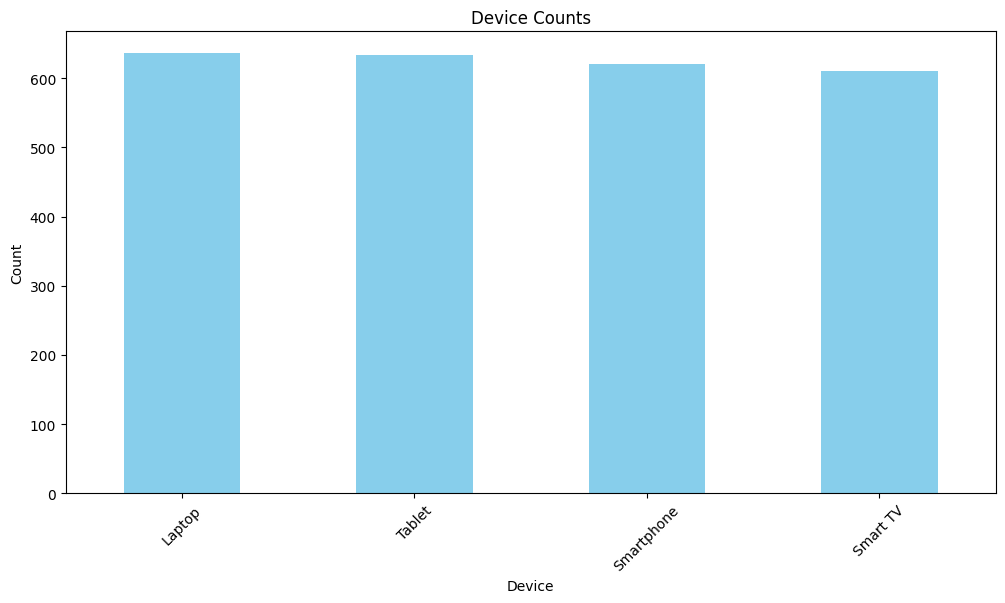

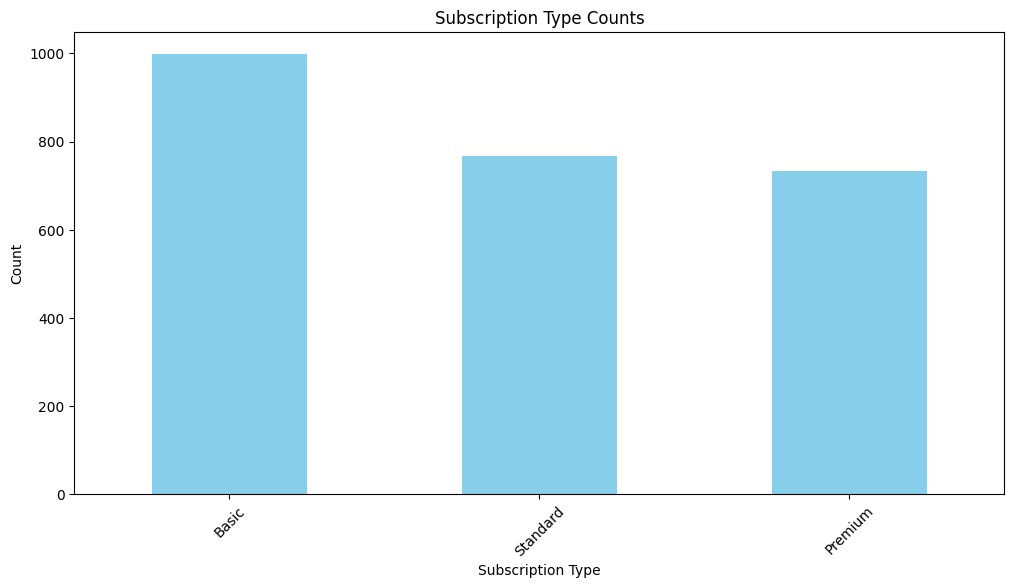

In [16]:
columns_title = {
    # Column : Name of bar chart
    'Gender': 'Gender Counts',
    'Device': 'Device Counts',
    'Subscription Type': 'Subscription Type Counts' 

}


for column, title in columns_title.items():
    plt.figure(figsize=(12,6))
    df[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [18]:
user_counts_by_country = df['Country'].value_counts().reset_index()
user_counts_by_country.columns = ['Country', 'User Count']

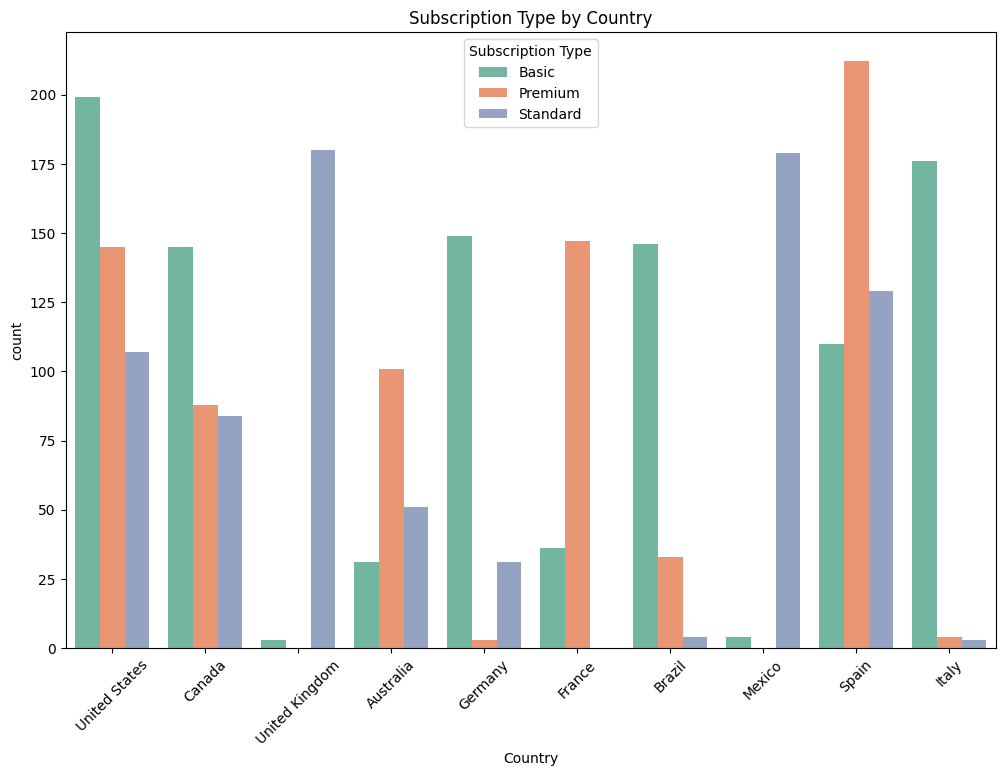

In [19]:
plt.figure(figsize=(12,8))
sns.countplot(x='Country', hue='Subscription Type', data=df, palette='Set2')
plt.title('Subscription Type by Country')
plt.xticks(rotation=45)
plt.show()

In [20]:
# Pivot Table
sub_by_country = df.pivot_table(index='Country',columns='Subscription Type', values='User ID',aggfunc='count',fill_value=0)
sub_by_country

Subscription Type,Basic,Premium,Standard
Country,,,
Australia,31,101,51
Brazil,146,33,4
Canada,145,88,84
France,36,147,0
Germany,149,3,31
Italy,176,4,3
Mexico,4,0,179
Spain,110,212,129
United Kingdom,3,0,180


In [21]:
# Create a Total column
sub_by_country['Total'] = sub_by_country.sum(axis=1)
sub_by_country

Subscription Type,Basic,Premium,Standard,Total
Country,,,,
Australia,31,101,51,183
Brazil,146,33,4,183
Canada,145,88,84,317
France,36,147,0,183
Germany,149,3,31,183
Italy,176,4,3,183
Mexico,4,0,179,183
Spain,110,212,129,451
United Kingdom,3,0,180,183


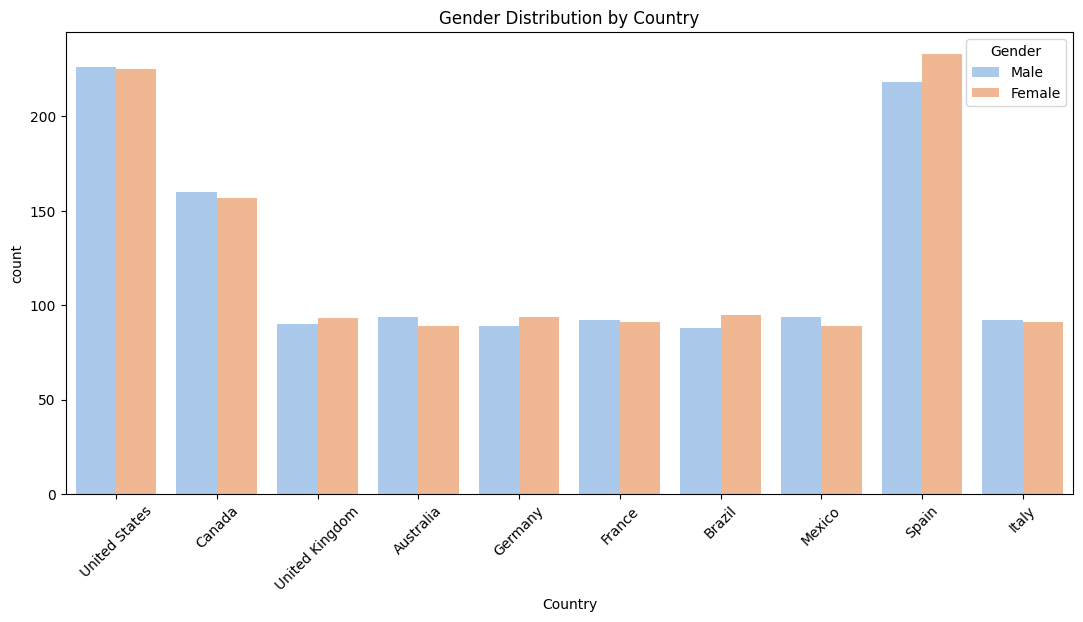

In [24]:
plt.figure(figsize=(13,6))
sns.countplot(x='Country', hue='Gender', data=df, palette='pastel')
plt.title('Gender Distribution by Country')
plt.xticks(rotation=45)
plt.show()

In [25]:
gender_by_country = df.pivot_table(index='Country', columns='Gender', values='User ID', aggfunc='count', fill_value=0)
gender_by_country

Gender,Female,Male
Country,,
Australia,89,94
Brazil,95,88
Canada,157,160
France,91,92
Germany,94,89
Italy,91,92
Mexico,89,94
Spain,233,218
United Kingdom,93,90


In [26]:
gender_by_country['Total'] = gender_by_country.sum(axis=1)
gender_by_country

Gender,Female,Male,Total
Country,,,
Australia,89,94,183
Brazil,95,88,183
Canada,157,160,317
France,91,92,183
Germany,94,89,183
Italy,91,92,183
Mexico,89,94,183
Spain,233,218,451
United Kingdom,93,90,183


In [28]:
# create a pivot table
sub_by_country_gender = df.pivot_table(index='Country', columns=['Subscription Type','Gender'],
                                       values='User ID', aggfunc='count', fill_value=0)

sub_by_country_gender

Subscription Type  Basic      Premium      Standard     
Gender            Female Male  Female Male   Female Male
Country                                                 
Australia             16   15      45   56       28   23
Brazil                78   68      16   17        1    3
Canada                68   77      40   48       49   35
France                17   19      74   73        0    0
Germany               80   69       1    2       13   18
Italy                 86   90       3    1        2    1
Mexico                 2    2       0    0       87   92
Spain                 60   50     113   99       60   69
United Kingdom         2    1       0    0       91   89
United States        103   96      72   73       50   57

In [29]:
sub_by_country_gender2 = df.pivot_table(index=['Country','Gender'], columns='Subscription Type',
                                        values='User ID', aggfunc='count', fill_value=0
                                        )

sub_by_country_gender2

Subscription Type      Basic  Premium  Standard
Country        Gender                          
Australia      Female     16       45        28
               Male       15       56        23
Brazil         Female     78       16         1
               Male       68       17         3
Canada         Female     68       40        49
               Male       77       48        35
France         Female     17       74         0
               Male       19       73         0
Germany        Female     80        1        13
               Male       69        2        18
Italy          Female     86        3         2
               Male       90        1         1
Mexico         Female      2        0        87
               Male        2        0        92
Spain          Female     60      113        60
               Male       50       99        69
United Kingdom Female      2        0        91
               Male        1        0        89
United States  Female    103       72        50
               Male       96       73        57

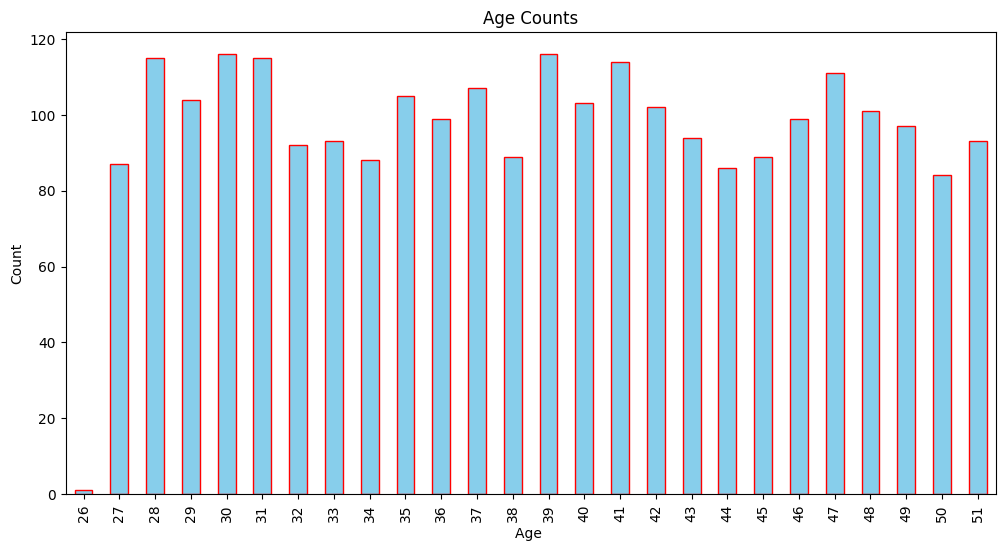

In [33]:
plt.figure(figsize=(12,6))
df['Age'].value_counts().sort_index().plot(kind='bar', color='skyblue',edgecolor='red')
plt.title("Age Counts")
plt.xlabel("Age ")
plt.ylabel("Count")
plt.show()

In [34]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [36]:
# Convert Join data to date time
df['Join Date'] = pd.to_datetime(df['Join Date'], format='%d-%m-%y')
df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'], format='%d-%m-%y')



In [37]:
# Calculate the difference in days between Join Date and Last Payment Date
df['Duration'] = (df['Last Payment Date'] - df['Join Date']).dt.days

In [38]:
df['Duration Month'] = df['Duration'].apply(lambda x: math.ceil(x/30)) 

In [39]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Duration,Duration Month
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month,511,18
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month,655,22
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,119,4
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month,351,12
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month,58,2


In [41]:
average_duration = df['Duration Month'].mean()

print(f"The average duration of subscriptions is {average_duration:.4f} months.")

The average duration of subscriptions is 10.7808 months.


In [43]:
df['LTV'] = df['Monthly Revenue']* df['Duration Month']
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Duration,Duration Month,LTV
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month,511,18,180
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month,655,22,330
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,119,4,48
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month,351,12,144
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month,58,2,20


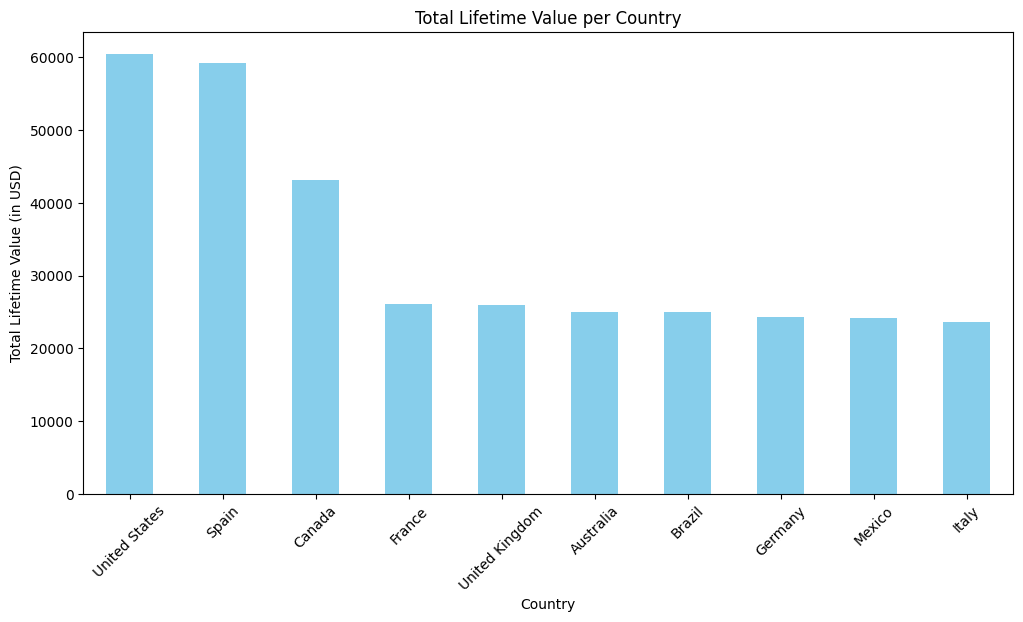

In [44]:
# Create a visual to see a revenue in those countries to find which country has the most subscriptions customers
ltv_per_country_sum = df.groupby('Country')['LTV'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
ltv_per_country_sum.plot(kind='bar', color='skyblue')
plt.title('Total Lifetime Value per Country')
plt.xlabel('Country')
plt.ylabel('Total Lifetime Value (in USD)')
plt.xticks(rotation=45)
plt.show()

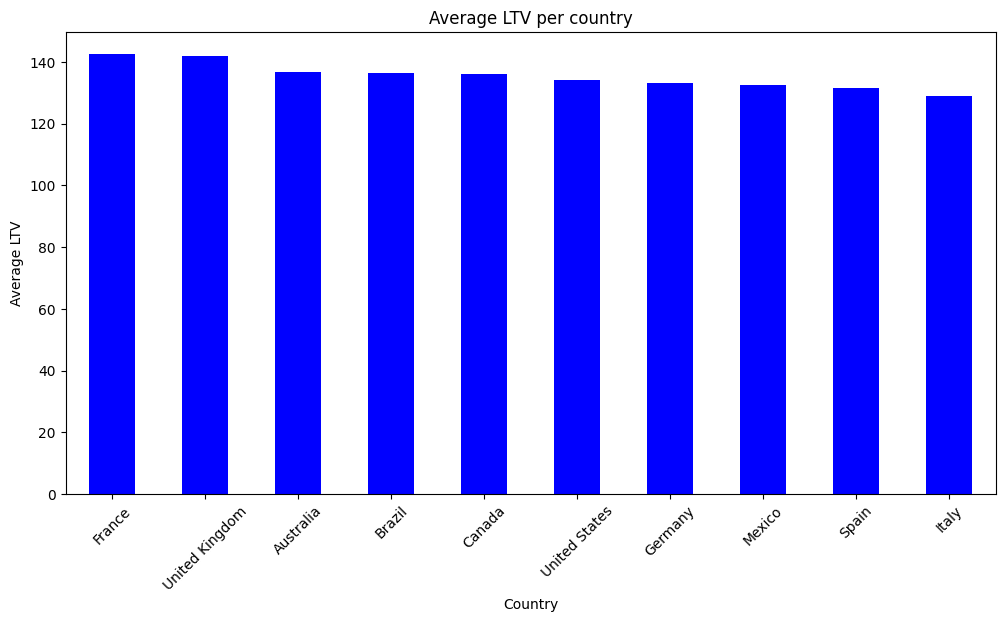

In [48]:
ltv_per_country_mean = df.groupby('Country')['LTV'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
ltv_per_country_mean.plot(kind='bar', color='blue')
plt.title('Average LTV per country')
plt.xlabel('Country')
plt.ylabel('Average LTV')
plt.xticks(rotation=45)
plt.show()

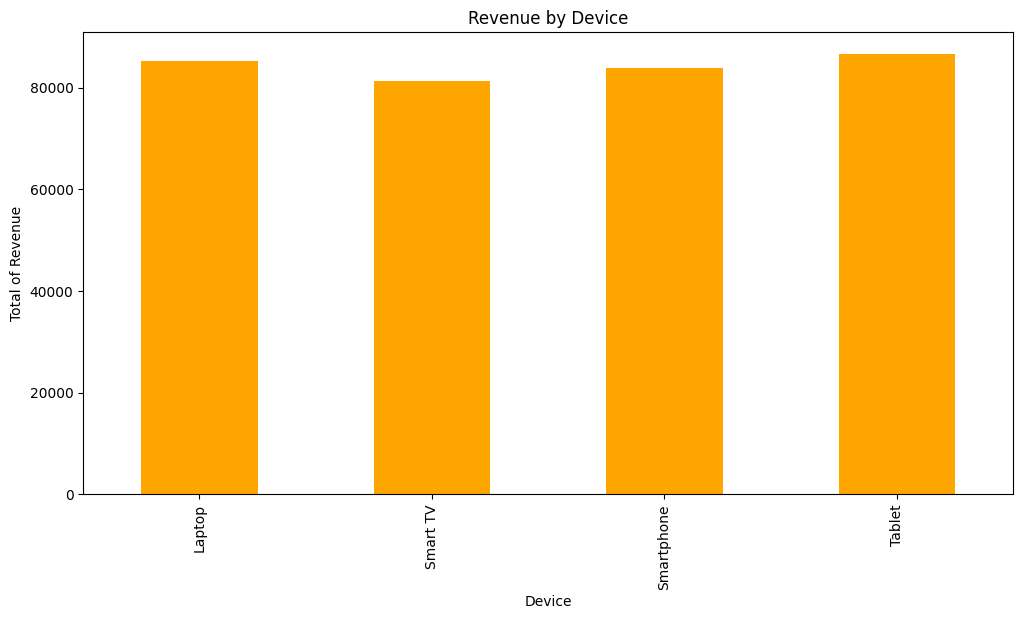

In [49]:
revenue_by_device = df.groupby('Device')['LTV'].sum()
plt.figure(figsize=(12,6))
revenue_by_device.plot(kind='bar', color='orange')
plt.title('Revenue by Device')
plt.xlabel("Device")
plt.ylabel("Total of Revenue")
plt.show()

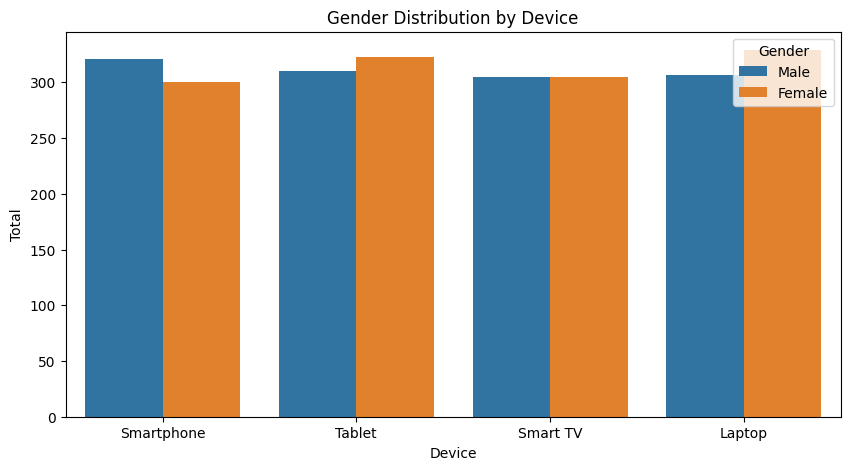

In [51]:
plt.figure(figsize=(10,5))
sns.countplot(x='Device', hue='Gender', data=df)
plt.title('Gender Distribution by Device')
plt.xlabel('Device')
plt.ylabel('Total')
plt.show()